<a href="https://colab.research.google.com/github/alaaeddines/opencv-licence-plate/blob/main/licence_plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing OpenCv

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


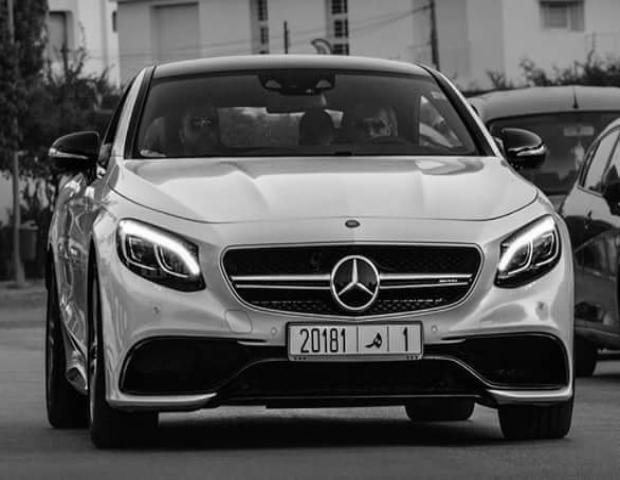

AttributeError: ignored

In [ ]:
img=cv2.imread("testv.jpg")
img=cv2.resize(img,(620,480))

imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(imgGray)
cv2.waitkey(0)

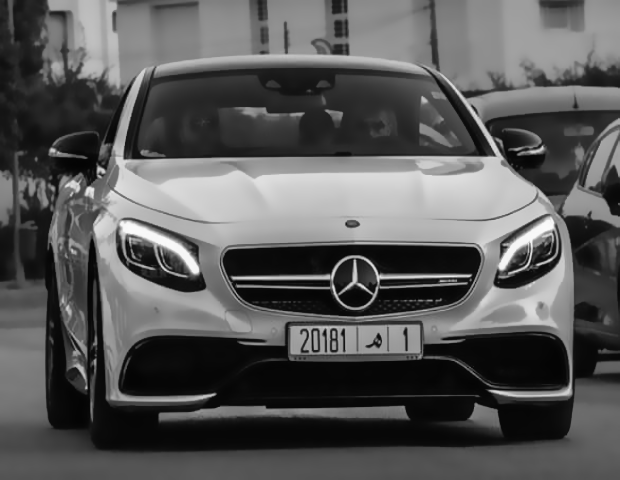

In [ ]:
imgBlur=cv2.bilateralFilter(imgGray,13,15,15)
cv2_imshow(imgBlur)


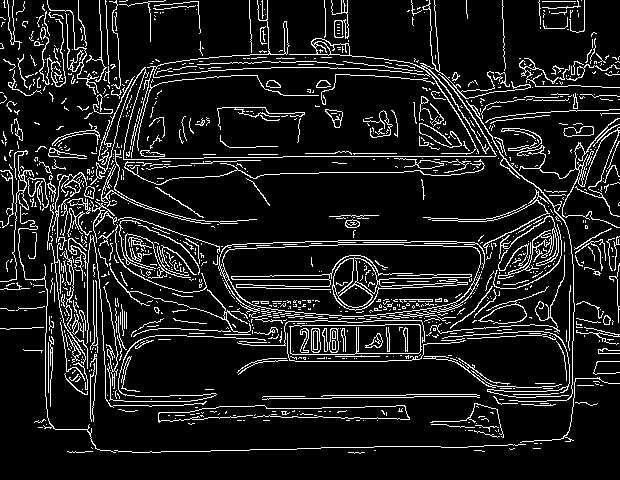

In [ ]:
imgEdge=cv2.Canny(imgBlur,30,20)
cv2_imshow(imgEdge)

In [ ]:
import imutils
contours=cv2.findContours(imgEdge.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(contours)
contours=sorted(contours,key=cv2.contourArea, reverse=True)[:10]

cnt=None
for c in contours:
  peri=cv2.arcLength(c,True)
  approx=cv2.approxPolyDP(c,0.018*peri,True)
  if len(approx)==4:
    cnt=approx
    break

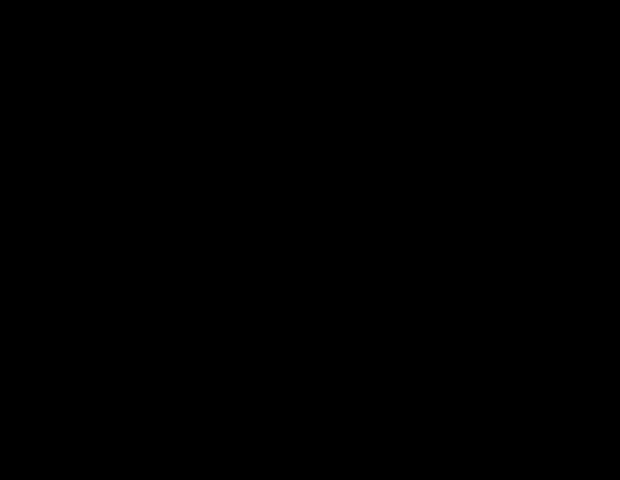

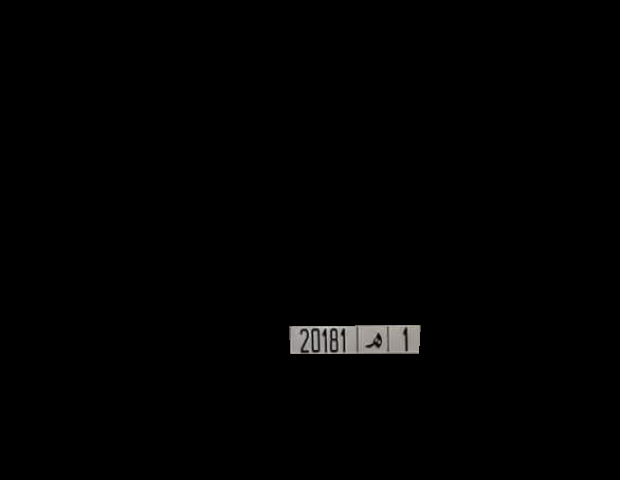

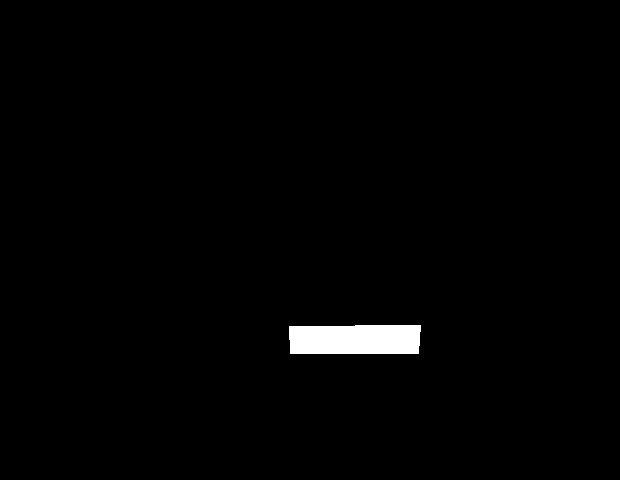

In [ ]:
import numpy as np

mask=np.zeros(imgGray.shape,np.uint8)
cv2_imshow(mask)
print(" ")
newimage=cv2.drawContours(mask,[cnt],0,255,-1)
newimage=cv2.bitwise_and(img,img,mask=mask)
cv2_imshow(newimage)
print(" ")
cv2_imshow(mask)



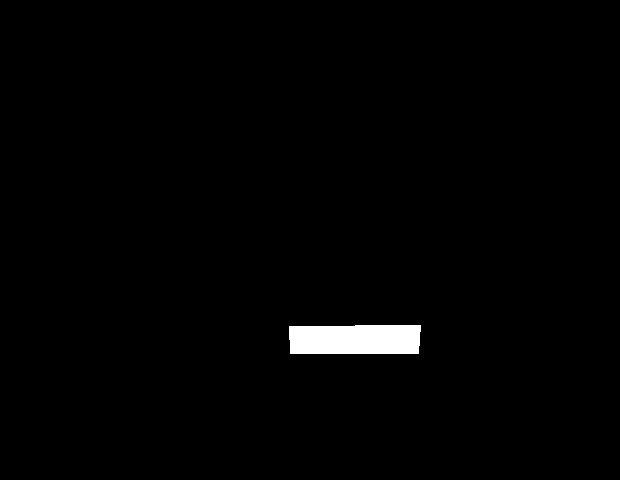

In [ ]:
cv2_imshow(mask)

In [ ]:
(x,y)=np.where(mask==255)
(topx,topy)=(np.min(x),np.min(y))
(bottomx,bottomy)=(np.max(x),np.max(y))
imgCrop=imgGray[topx:bottomx+1,topy:bottomy+1]
cv2_imshow(imgCrop)
cv2.imwrite("imgCrop.jpg",imgCrop)
imgCrop.shape

(29, 132)